In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn
import sklearn.cluster as cluster
%matplotlib inline

In [6]:
df=pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [24]:
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [9]:
df.rename(columns={'CustomerID':'id','Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [10]:
df.head(4)

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [11]:
df.isnull().values.any()

False

In [12]:
df.describe()

,id,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


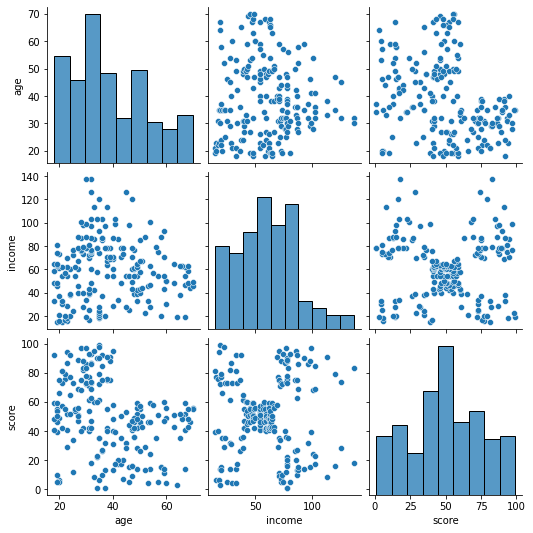

In [13]:
seaborn.pairplot(df[['age','income','score']])

In [14]:
kmeans=cluster.KMeans(n_clusters=5)
kmeans=kmeans.fit(df[['income','score']])
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [15]:
df['clusters']=kmeans.labels_

In [25]:
df.head(5)

,id,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,3,1


In [17]:
df['clusters'].value_counts()

0    81
2    39
4    35
3    23
1    22
Name: clusters, dtype: int64

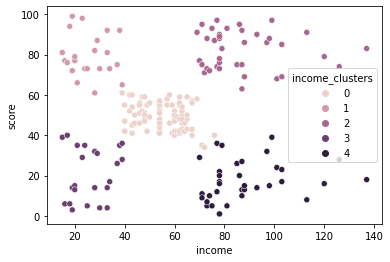

In [28]:
seaborn.scatterplot(x='income',y='score',hue='income_clusters',data=df)

In [19]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans=kmeans.fit(df[['age','score']])
kmeans.cluster_centers_


array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [20]:
df['age_clusters']=kmeans.labels_

In [21]:
df

,id,gender,age,income,score,clusters,age_clusters
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,4,1
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,4,1


In [22]:
df.rename(columns={'clusters':'income_clusters'},inplace=True)

In [23]:
df.head(5)

,id,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,3,1


In [26]:
df['age_clusters'].value_counts()

1    115
0     85
Name: age_clusters, dtype: int64

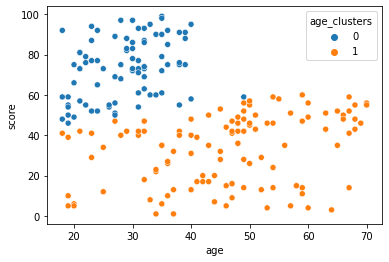

In [27]:
seaborn.scatterplot(x='age',y='score',hue='age_clusters',data=df)